In [1]:
# Import relevant Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
sns.set()

In [2]:
# Import data into dataframe and check columns

df = pd.read_csv(r"C:\Users\Christian\Desktop\ML-BootCamp-Team-3-Project-02-master\train.csv")
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [3]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [4]:
# Check for missing values

df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Pre-processing

In [5]:
# Drop missing values

df1 = df[df.education.notnull()]
df2 = df.dropna()
df2.reset_index()
df2

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [6]:
df2.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.00000,48660.000000,48660.000000
mean,39169.271681,1.251993,35.589437,3.337526,6.31157,0.356473,0.02314,63.603309,0.086971
std,22630.461554,0.604994,7.534571,1.257922,4.20476,0.478962,0.15035,13.273502,0.281795
min,1.000000,1.000000,20.000000,1.000000,1.00000,0.000000,0.00000,39.000000,0.000000
25%,19563.500000,1.000000,30.000000,3.000000,3.00000,0.000000,0.00000,51.000000,0.000000
50%,39154.000000,1.000000,34.000000,3.000000,5.00000,0.000000,0.00000,60.000000,0.000000
75%,58788.250000,1.000000,39.000000,4.000000,8.00000,1.000000,0.00000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.00000,1.000000,1.00000,99.000000,1.000000


In [7]:
####COME BACK AND WRITE CODE TO VISUALIZE THAT THE DATA IS IMBALANCED

In [8]:
# Drop irrelevant columns

df2 = df2.drop(columns = ['employee_id','department','region','recruitment_channel'])
df2

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Master's & above,f,1,35,5.0,8,1,0,49,0
1,Bachelor's,m,1,30,5.0,4,0,0,60,0
2,Bachelor's,m,1,34,3.0,7,0,0,50,0
3,Bachelor's,m,2,39,1.0,10,0,0,50,0
4,Bachelor's,m,1,45,3.0,2,0,0,73,0
5,Bachelor's,m,2,31,3.0,7,0,0,85,0
6,Bachelor's,f,1,31,3.0,5,0,0,59,0
7,Master's & above,m,1,33,3.0,6,0,0,63,0
8,Bachelor's,m,1,28,4.0,5,0,0,83,0
9,Master's & above,m,1,32,5.0,5,1,0,54,0


In [9]:
# Map strings to integer values

df2['gender'] = df2['gender'].map( {'f': 1, 'm': 0} ).astype(int)
df2['education'] = df2['education'].map({"Master's & above" : 1, "Bachelor's" : 0.5, "Below Secondary" : 0}).astype(float)
df2.head(25)
df3 = df2.copy()

In [10]:
# Import the MixMaxScaler 
# Transform the dataset to normalized dataset

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[['age', 'no_of_trainings','previous_year_rating','length_of_service', 'avg_training_score']] = scaler.fit_transform(df2[['age', 'no_of_trainings','previous_year_rating','length_of_service', 'avg_training_score']])


df2

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1.0,1,0.000000,0.375,1.00,0.194444,1,0,0.166667,0
1,0.5,0,0.000000,0.250,1.00,0.083333,0,0,0.350000,0
2,0.5,0,0.000000,0.350,0.50,0.166667,0,0,0.183333,0
3,0.5,0,0.111111,0.475,0.00,0.250000,0,0,0.183333,0
4,0.5,0,0.000000,0.625,0.50,0.027778,0,0,0.566667,0
5,0.5,0,0.111111,0.275,0.50,0.166667,0,0,0.766667,0
6,0.5,1,0.000000,0.275,0.50,0.111111,0,0,0.333333,0
7,1.0,0,0.000000,0.325,0.50,0.138889,0,0,0.400000,0
8,0.5,0,0.000000,0.200,0.75,0.111111,0,0,0.733333,0
9,1.0,0,0.000000,0.300,1.00,0.111111,1,0,0.250000,0


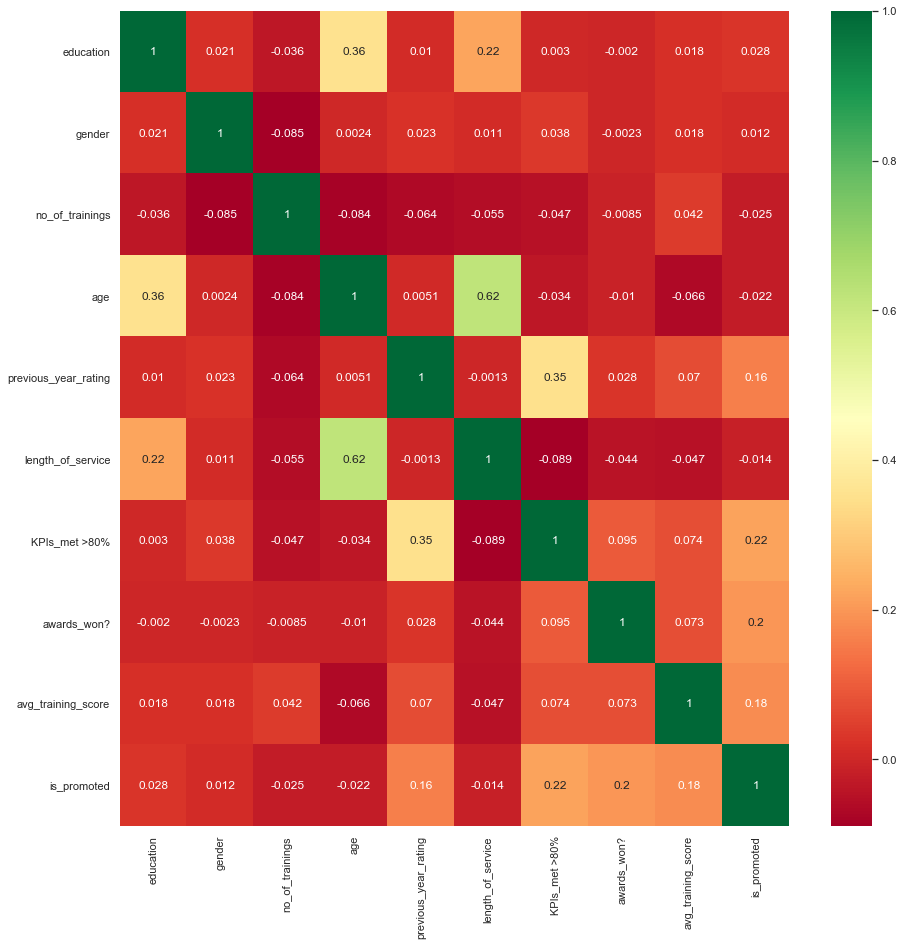

In [11]:
# Get correlations of each features in dataset

corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

# Plot heat map
sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
# Visualize coerrelations in data table

pd.DataFrame.corr(df2, method ='pearson')

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
education,1.000000,0.021494,-0.036286,0.355682,0.010256,0.224296,0.002989,-0.001961,0.018249,0.027547
gender,0.021494,1.000000,-0.085456,0.002446,0.022828,0.011082,0.038172,-0.002275,0.017835,0.011909
no_of_trainings,-0.036286,-0.085456,1.000000,-0.083590,-0.064236,-0.055440,-0.046673,-0.008528,0.042033,-0.025006
age,0.355682,0.002446,-0.083590,1.000000,0.005068,0.620348,-0.033886,-0.010335,-0.066214,-0.022412
previous_year_rating,0.010256,0.022828,-0.064236,0.005068,1.000000,-0.001252,0.352434,0.027920,0.070041,0.158715
length_of_service,0.224296,0.011082,-0.055440,0.620348,-0.001252,1.000000,-0.089081,-0.043750,-0.047461,-0.014267
KPIs_met >80%,0.002989,0.038172,-0.046673,-0.033886,0.352434,-0.089081,1.000000,0.095208,0.074114,0.219933
awards_won?,-0.001961,-0.002275,-0.008528,-0.010335,0.027920,-0.043750,0.095208,1.000000,0.073132,0.196971
avg_training_score,0.018249,0.017835,0.042033,-0.066214,0.070041,-0.047461,0.074114,0.073132,1.000000,0.179494
is_promoted,0.027547,0.011909,-0.025006,-0.022412,0.158715,-0.014267,0.219933,0.196971,0.179494,1.000000


# Upsampling

In [13]:
#Separate input features and target
X = df2.drop(['is_promoted'], axis = 1)
y = df2['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(38928, 9)
(9732, 9)


In [14]:
# concatenate our training data back together
df = pd.concat([X_train, y_train], axis=1)

df_majority = df[df.is_promoted==0]
df_minority = df[df.is_promoted==1]

In [15]:
# Upsample minority class
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=len(df_majority),  # to match majority class
                                 random_state =27 ) # reproducible results

In [16]:
# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [17]:
# Display new class counts
df_upsampled.is_promoted.value_counts()

1    35563
0    35563
Name: is_promoted, dtype: int64

In [18]:
X = df_upsampled.drop(['is_promoted'], axis = 1)
y = df_upsampled['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(56900, 9)
(14226, 9)


# SVM Classification Model

In [19]:
svc= SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [20]:
confusion_mat_svm = confusion_matrix(y_test,y_pred)

In [21]:
confusion_svm = pd.DataFrame(confusion_mat_svm)

In [22]:
confusion_svm

,0,1
0,4739,2340
1,1080,6067


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [24]:
print(f"Accuracy : {accuracy_score(y_test,y_pred):.4f}")
print(f"f1_score : {f1_score(y_test,y_pred):.4f}")
print(f"precision : {precision_score(y_test,y_pred):.4f}")
print(f"recall : {recall_score(y_test,y_pred):.4f}")
print(f"classification report : {classification_report(y_test,y_pred)}")

Accuracy : 0.7596
f1_score : 0.7801
precision : 0.7217
recall : 0.8489
classification report :               precision    recall  f1-score   support

           0       0.81      0.67      0.73      7079
           1       0.72      0.85      0.78      7147

    accuracy                           0.76     14226
   macro avg       0.77      0.76      0.76     14226
weighted avg       0.77      0.76      0.76     14226



# Parameter optimization for SVM

Kernel Optimization

In [25]:
Fscore = pd.DataFrame()
for n in range(4):
    svc_poly = SVC(kernel = 'poly', degree = n)
    svc_poly.fit(X_train,y_train)
    y_pred = svc_poly.predict(X_test)
    f_value = f1_score(y_test,y_pred)
    Fscore = Fscore.append({'polynomial_deg' : n, 'Fscore': f_value},ignore_index = True)

Fscore

,Fscore,polynomial_deg
0,0.000000,0.0
1,0.723222,1.0
2,0.770684,2.0
3,0.774581,3.0


In [26]:
Fscore = pd.DataFrame(columns = ['Kernel_type','F_score'])
kernel_type = ['rbf','sigmoid']
for name in kernel_type:
    clf1 = SVC(kernel = name)
    clf1.fit(X_train,y_train)
    y_pred = clf1.predict(X_test)
    f_value = f1_score(y_test,y_pred)
    Fscore = Fscore.append({'Kernel_type' : name, 'F_score': f_value},ignore_index = True)
Fscore

,Kernel_type,F_score
0,rbf,0.780121
1,sigmoid,0.460131


# Neural Network MLP Classifier

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

predictions = mlp.predict(X_test)

print(f"Accuracy : {accuracy_score(y_test,y_pred):.4f}")
print(f"f1_score : {f1_score(y_test,y_pred):.4f}")
print(f"precision : {precision_score(y_test,y_pred):.4f}")
print(f"recall : {recall_score(y_test,y_pred):.4f}")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Accuracy : 0.7150
f1_score : 0.7134
precision : 0.7207
recall : 0.7063
[[5692 1387]
 [ 747 6400]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      7079
           1       0.82      0.90      0.86      7147

    accuracy                           0.85     14226
   macro avg       0.85      0.85      0.85     14226
weighted avg       0.85      0.85      0.85     14226



In [25]:
#Import necessary packages
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Logisitc Regression Model

In [26]:
LogR = LogisticRegression()
LogR.fit(X_train,y_train)

y_pred=LogR.predict(X_test)

confusion_LogR = pd.DataFrame(confusion_matrix(y_test,y_pred))
print(confusion_LogR) 
print(f"Accuracy : {accuracy_score(y_test,y_pred):.4f}")
print(f"f1_score : {f1_score(y_test,y_pred):.4f}")
print(f"precision : {precision_score(y_test,y_pred):.4f}")
print(f"recall : {recall_score(y_test,y_pred):.4f}")

      0     1
0  5123  1956
1  2099  5048
Accuracy : 0.7150
f1_score : 0.7134
precision : 0.7207
recall : 0.7063


# Kmeans Clustering Model

In [27]:
kmeans = KMeans(n_clusters=2).fit(X_train)
y_pred = kmeans.predict(X_test)

confusion_kmeans = pd.DataFrame(confusion_matrix(y_test,y_pred))
confusion_kmeans   

print(f"Accuracy : {accuracy_score(y_test,y_pred):.4f}")
print(f"f1_score : {f1_score(y_test,y_pred):.4f}")
print(f"precision : {precision_score(y_test,y_pred):.4f}")
print(f"recall : {recall_score(y_test,y_pred):.4f}")
print(f"classification report : {classification_report(y_test,y_pred)}")

Accuracy : 0.4938
f1_score : 0.5453
precision : 0.4969
recall : 0.6042
classification report :               precision    recall  f1-score   support

           0       0.49      0.38      0.43      7079
           1       0.50      0.60      0.55      7147

    accuracy                           0.49     14226
   macro avg       0.49      0.49      0.49     14226
weighted avg       0.49      0.49      0.49     14226



# K Nearest Neighbour Model

In [28]:
KNN = KNeighborsClassifier()

KNN.fit(X_train,y_train)

y_pred=KNN.predict(X_test)

confusion_KNN = pd.DataFrame(confusion_matrix(y_test,y_pred))
confusion_KNN 

print(f"Accuracy : {accuracy_score(y_test,y_pred):.4f}")
print(f"f1_score : {f1_score(y_test,y_pred):.4f}")
print(f"precision : {precision_score(y_test,y_pred):.4f}")
print(f"recall : {recall_score(y_test,y_pred):.4f}")
print(f"classification report : {classification_report(y_test,y_pred)}")

Accuracy : 0.9019
f1_score : 0.9104
precision : 0.8407
recall : 0.9927
classification report :               precision    recall  f1-score   support

           0       0.99      0.81      0.89      7079
           1       0.84      0.99      0.91      7147

    accuracy                           0.90     14226
   macro avg       0.92      0.90      0.90     14226
weighted avg       0.92      0.90      0.90     14226



# Naive Bayes Model

In [29]:
NB = GaussianNB()

NB.fit(X_train,y_train)

y_pred=NB.predict(X_test)

confusion_NB = pd.DataFrame(confusion_matrix(y_test,y_pred))
confusion_NB 

print(f"Accuracy : {accuracy_score(y_test,y_pred):.4f}")
print(f"f1_score : {f1_score(y_test,y_pred):.4f}")
print(f"precision : {precision_score(y_test,y_pred):.4f}")
print(f"recall : {recall_score(y_test,y_pred):.4f}")
print(f"classification report : {classification_report(y_test,y_pred)}")

Accuracy : 0.6665
f1_score : 0.5950
precision : 0.7631
recall : 0.4876
classification report :               precision    recall  f1-score   support

           0       0.62      0.85      0.72      7079
           1       0.76      0.49      0.60      7147

    accuracy                           0.67     14226
   macro avg       0.69      0.67      0.66     14226
weighted avg       0.69      0.67      0.66     14226



# Random Forest Model

In [30]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)

y_pred=RF.predict(X_test)

confusion_RF = pd.DataFrame(confusion_matrix(y_test,y_pred))
confusion_RF 

print(f"Accuracy : {accuracy_score(y_test,y_pred):.4f}")
print(f"f1_score : {f1_score(y_test,y_pred):.4f}")
print(f"precision : {precision_score(y_test,y_pred):.4f}")
print(f"recall : {recall_score(y_test,y_pred):.4f}")
print(f"classification report : \n{classification_report(y_test,y_pred)}")

Accuracy : 0.9675
f1_score : 0.9687
precision : 0.9393
recall : 1.0000
classification report : 
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      7079
           1       0.94      1.00      0.97      7147

    accuracy                           0.97     14226
   macro avg       0.97      0.97      0.97     14226
weighted avg       0.97      0.97      0.97     14226

